In [16]:
import sys
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import cm

# Custom package
sys.path.append('/home/rrp000/sea_ice/code/')
from icepack import get_dataset
from icepack.analysis import *
from icepack.splot import *

# Some useful lists and dicts
monthletters = ['J','F','M','A','M','J','J','A','S','O','N','D']
monthstr = ['01','02','03','04','05','06','07','08','09','10','11','12']
monthdict = {1:r'$\mathbf{January}$',
             2:r'$\mathbf{February}$',
             3:r'$\mathbf{March}$',
             4:r'$\mathbf{April}$',
             5:r'$\mathbf{May}$',
             6:r'$\mathbf{June}$',
             7:r'$\mathbf{July}$',
             8:r'$\mathbf{August}$',
             9:r'$\mathbf{September}$',
             10:r'$\mathbf{October}$',
             11:r'$\mathbf{November}$',
             12:r'$\mathbf{December}$'}

method = 'mean'
daterange = (1990,2015)
daterange_clim = (1990,2015)
grid_path = "~/sea_ice/data/grids/grid_1x1.nc"
grid = xr.open_dataset(grid_path)

# Open datasets

In [17]:
# open data
sic = get_dataset('Had2CIS')

# calculate SIE and anomalies
sia_Had2CIS = get_icearea(sic, grid, lat_bounds=(-90,0), sic_label='sicn', lat_label='lat', lon_label='lon', ensemble=None)
sia_anom_Had2CIS = get_anomalies(sia_Had2CIS,'SIA',ref_period=daterange)
sia_clim_Had2CIS = get_climatology(sia_Had2CIS,var='SIA',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


In [18]:
sic = get_dataset('OSI-SAF')

# calculate SIE and anomalies
sia_OSISAF = get_icearea(sic, grid, lat_bounds=(-90,0), sic_label='ice_conc', lat_label='lat', lon_label='lon', ensemble=None, sic_factor=1e-2)
sia_anom_OSISAF = get_anomalies(sia_OSISAF,'SIA',ref_period=daterange)
# sia_clim_OSISAF = get_climatology(sia_OSISAF,var='SIA',ref_period=daterange_clim)

/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


In [19]:
# CELL TAKES ~1 MINUTE TO RUN

# open data and format time
sic_CanESM5_init = get_dataset('CanESM5.1_i')
sic_CanESM5_init = [format_time_coord(data,f'1980-{monthstr[i]}',f'202{3+int(np.heaviside(i,0))}-{monthstr[i-1]}',freq='M') for i,data in enumerate(sic_CanESM5_init)]

# calculate SIa (ensemble mean) and SIa anomalies
print("Calculating SIA")
sia_CanESM5_init = []
for i,sic in enumerate(sic_CanESM5_init):
    sia_CanESM5_init.append(get_icearea(sic, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble='mean', sic_factor=1e-2))
sia_anom_CanESM5_init = [get_anomalies(sia,'SIA',ref_period=daterange) for sia in sia_CanESM5_init]

# add a lead time coordinate to the SIA data set
print("Adding a lead time coordinate")
for i in range(len(sic_CanESM5_init)):
    im = i + 1
    sic_CanESM5_init[i] = sic_CanESM5_init[i].mean(dim='ensemble').assign_coords(lead=(sic_CanESM5_init[i]['time.month'] - im)%12) * 1e-2
    sia_CanESM5_init[i]['lead'] = (sia_CanESM5_init[i]['time.month'] - im)%12
    sia_anom_CanESM5_init[i]['lead'] = (sia_anom_CanESM5_init[i]['time.month'] - im)%12

# re-sort by leadtime
sic_CanESM5_init_lt = [xr.merge([sic_CanESM5_init[im-1].where(sic_CanESM5_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sia_CanESM5_init_lt = [xr.merge([sia_CanESM5_init[im-1].where(sia_CanESM5_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sia_anom_CanESM5_init_lt = [xr.merge([sia_anom_CanESM5_init[im-1].where(sia_anom_CanESM5_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]

# Calculate climatology
sic_clim_CanESM5_init = [get_climatology(sic,var='siconc',ref_period=daterange_clim) for sic in sic_CanESM5_init_lt]
sia_clim_CanESM5_init = [get_climatology(sia,var='SIA',ref_period=daterange_clim) for sia in sia_CanESM5_init_lt]

Calculating SIA


/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:
/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:
/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.

Adding a lead time coordinate


In [20]:
# CELL TAKES ~1 MINUTE TO RUN

# open data and format time
sic_GEM5NEMO_init = get_dataset('GEM5.2-NEMO_i')
sic_GEM5NEMO_init = [format_time_coord(data,f'1990-{monthstr[i]}',f'202{int(np.heaviside(i,0))}-{monthstr[i-1]}',freq='M') for i,data in enumerate(sic_GEM5NEMO_init)]

# calculate SIA (ensemble mean) and SIA anomalies
print("Calculating SIA")
grid['lon'] = grid['lon'] + 0.5
sia_GEM5NEMO_init = []
for i,sic in enumerate(sic_GEM5NEMO_init):
    sia_GEM5NEMO_init.append(get_icearea(sic, grid, lat_bounds=(-90,0), sic_label='sicn', lat_label='lat', lon_label='lon', ensemble='mean'))
sia_anom_GEM5NEMO_init = [get_anomalies(sia,'SIA',ref_period=daterange) for sia in sia_GEM5NEMO_init]

# add a lead time coordinate to the SIa data set, and resort by lead time
print("Adding a lead time coordinate")
for i in range(len(sia_GEM5NEMO_init)):
    im = i + 1
    sic_GEM5NEMO_init[i] = sic_GEM5NEMO_init[i].mean(dim='ensemble').assign_coords(lead=(sic_GEM5NEMO_init[i]['time.month'] - im)%12)
    sia_GEM5NEMO_init[i]['lead'] = (sia_GEM5NEMO_init[i]['time.month'] - im)%12
    sia_anom_GEM5NEMO_init[i]['lead'] = (sia_anom_GEM5NEMO_init[i]['time.month'] - im)%12
sic_GEM5NEMO_init_lt = [xr.merge([sic_GEM5NEMO_init[im-1].where(sic_GEM5NEMO_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sia_GEM5NEMO_init_lt = [xr.merge([sia_GEM5NEMO_init[im-1].where(sia_GEM5NEMO_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sia_anom_GEM5NEMO_init_lt = [xr.merge([sia_anom_GEM5NEMO_init[im-1].where(sia_anom_GEM5NEMO_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]

# Calculate climatology
sic_clim_GEM5NEMO_init = [get_climatology(sic,var='sicn',ref_period=daterange_clim) for sic in sic_GEM5NEMO_init_lt]
sia_clim_GEM5NEMO_init = [get_climatology(sia,var='SIA',ref_period=daterange_clim) for sia in sia_GEM5NEMO_init_lt]

Calculating SIA


/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:
/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:
/home/rrp000/sea_ice/code/icepack/analysis.py:213: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.

Adding a lead time coordinate


/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/miniconda3/envs/icepy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/miniconda3/envs/icepy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/miniconda3/envs/icepy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/miniconda3/envs/icepy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/minico

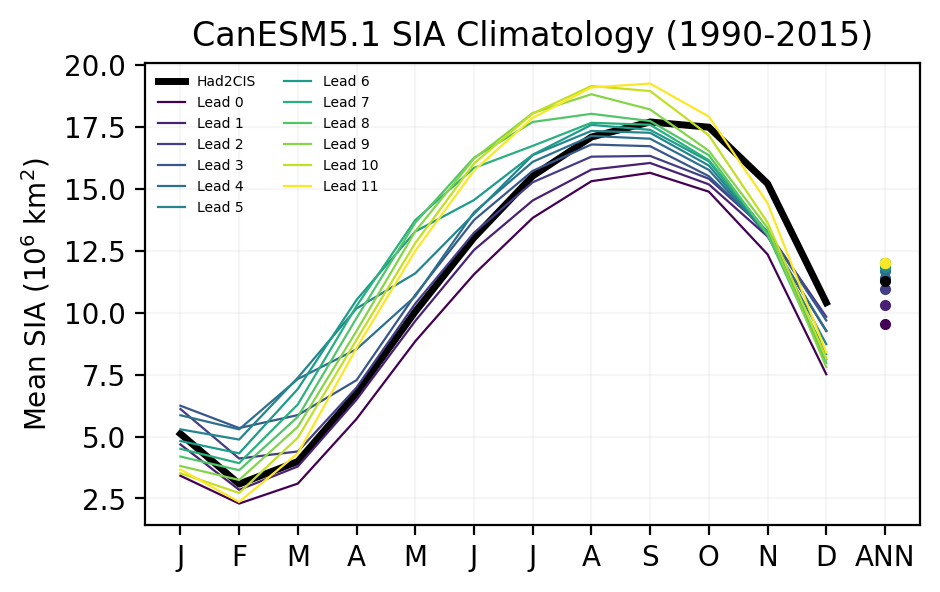

In [21]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted. Labels for legend are defined in a previous cell.
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']
colors = cm.viridis(np.linspace(0,1,12))
labels = ['Had2CIS','Lead 0','Lead 1','Lead 2','Lead 3','Lead 4','Lead 5','Lead 6','Lead 7','Lead 8','Lead 9','Lead 10','Lead 11']

# Plot the data
ax.plot(sia_clim_Had2CIS['SIA'].values,color='black',label="Had2CIS",linewidth=2.5)
for i,data in enumerate(sia_clim_CanESM5_init):
    ax.plot(data['SIA'].values,'-',color=colors[i],label=labels[i+1],linewidth=.8)
for i,data in enumerate(sia_clim_CanESM5_init):
    ax.plot(12,data['overall_mean'].values,'.',color=colors[i])
ax.plot(12,sia_clim_Had2CIS['overall_mean'].values,'.',color='black')

# Other details of the plots
ax.set_xticks(np.arange(13))
ax.set_xticklabels(xticklabels)
ax.set_xlabel(None)
ax.set_ylabel(r"Mean SIA ($10^6\ \mathrm{km}^2$)")
ax.set_title(f"CanESM5.1 SIA Climatology ({daterange_clim[0]}-{daterange_clim[1]})")
ax.grid(alpha=0.1)
ax.legend(labels,ncols=2,fontsize=5,frameon=False)
plt.show()

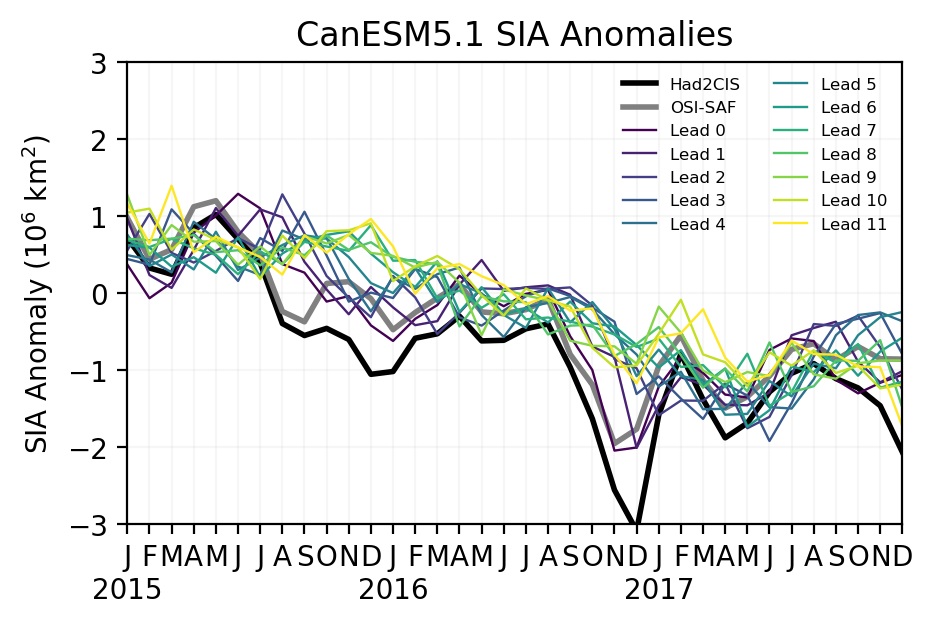

In [22]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2015,2017]
colors = cm.viridis(np.linspace(0,1,12))
labels = ['Had2CIS','OSI-SAF','Lead 0','Lead 1','Lead 2','Lead 3','Lead 4','Lead 5','Lead 6','Lead 7','Lead 8','Lead 9','Lead 10','Lead 11']

# Plot the data
sia_anom_Had2CIS.where((sia_anom_Had2CIS['time.year']>=y0) & (sia_anom_Had2CIS['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,legend=False,linewidth=2,color='black')
sia_anom_OSISAF.where((sia_anom_OSISAF['time.year']>=y0) & (sia_anom_OSISAF['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,legend=False,linewidth=2,color='grey')
for i,data in enumerate(sia_anom_CanESM5_init_lt):
    data = data.drop_vars('lead')
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,legend=False,linewidth=.85,color=colors[i])

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIA Anomaly ($10^6\ \mathrm{km}^2$)")
ax.set_ylim(-3,3)
ax.set_title("CanESM5.1 SIA Anomalies")
ax.grid(alpha=0.1)
ax.legend(labels,ncols=2,fontsize=6,frameon=False)
plt.show()

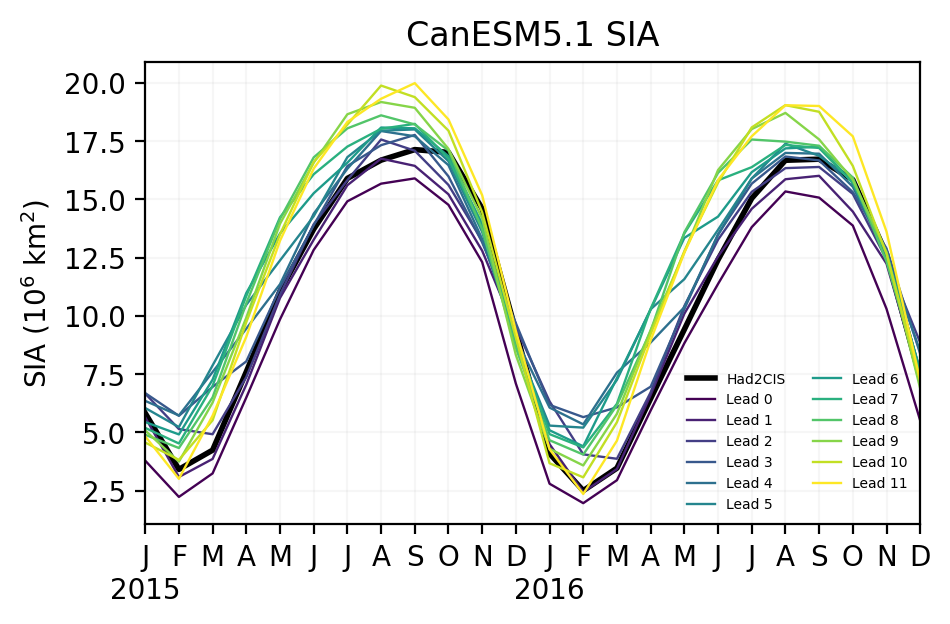

In [23]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2015,2016]
colors = cm.viridis(np.linspace(0,1,12))
labels = ['Had2CIS','Lead 0','Lead 1','Lead 2','Lead 3','Lead 4','Lead 5','Lead 6','Lead 7','Lead 8','Lead 9','Lead 10','Lead 11']

# Plot the data
sia_Had2CIS.where((sia_Had2CIS['time.year']>=y0) & (sia_Had2CIS['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,legend=False,linewidth=2,color='black')
for i,data in enumerate(sia_CanESM5_init_lt):
    data = data.drop_vars('lead')
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,legend=False,linewidth=.85,color=colors[i])

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIA ($10^6\ \mathrm{km}^2$)")
# ax.set_ylim(-3,3)
ax.set_title("CanESM5.1 SIA")
ax.grid(alpha=0.1)
ax.legend(labels,ncols=2,fontsize=5,frameon=False)
plt.show()

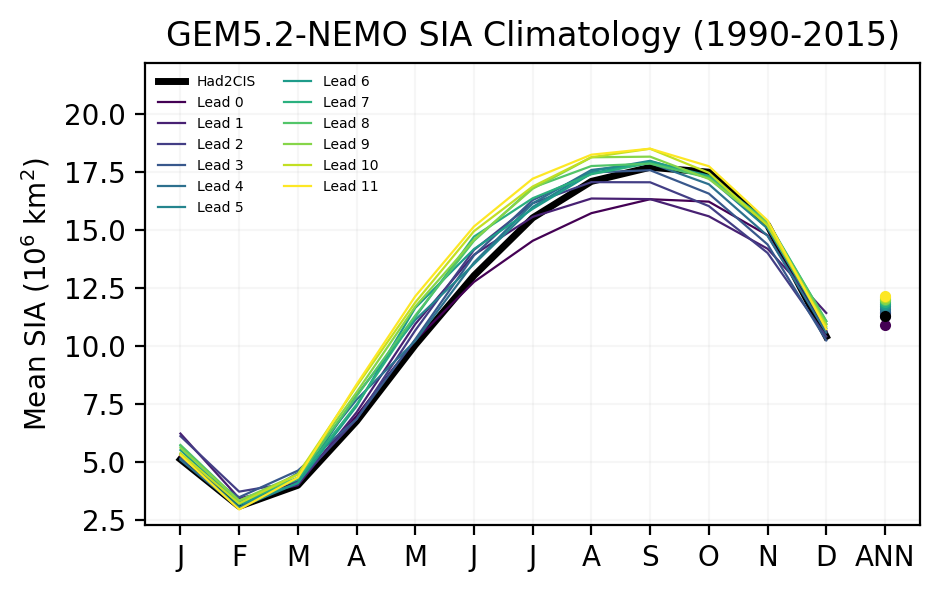

In [24]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted. Labels for legend are defined in a previous cell.
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']
colors = cm.viridis(np.linspace(0,1,12))
labels = ['Had2CIS','Lead 0','Lead 1','Lead 2','Lead 3','Lead 4','Lead 5','Lead 6','Lead 7','Lead 8','Lead 9','Lead 10','Lead 11']

# Plot the data
ax.plot(sia_clim_Had2CIS['SIA'].values,color='black',label="Had2CIS",linewidth=2.5)
for i,data in enumerate(sia_clim_GEM5NEMO_init):
    ax.plot(data['SIA'].values,'-',color=colors[i],label=labels[i+1],linewidth=.8)
for i,data in enumerate(sia_clim_GEM5NEMO_init):
    ax.plot(12,data['overall_mean'].values,'.',color=colors[i])
ax.plot(12,sia_clim_Had2CIS['overall_mean'].values,'.',color='black')

# Other details of the plots
ax.set_xticks(np.arange(13))
ax.set_xticklabels(xticklabels)
ax.set_xlabel(None)
ax.set_ylabel(r"Mean SIA ($10^6\ \mathrm{km}^2$)")
ax.set_ylim(2.3,22.2)
ax.set_title(f"GEM5.2-NEMO SIA Climatology (1990-{daterange_clim[1]})")
ax.grid(alpha=0.1)
ax.legend(labels,ncols=2,fontsize=5,frameon=False)
plt.show()

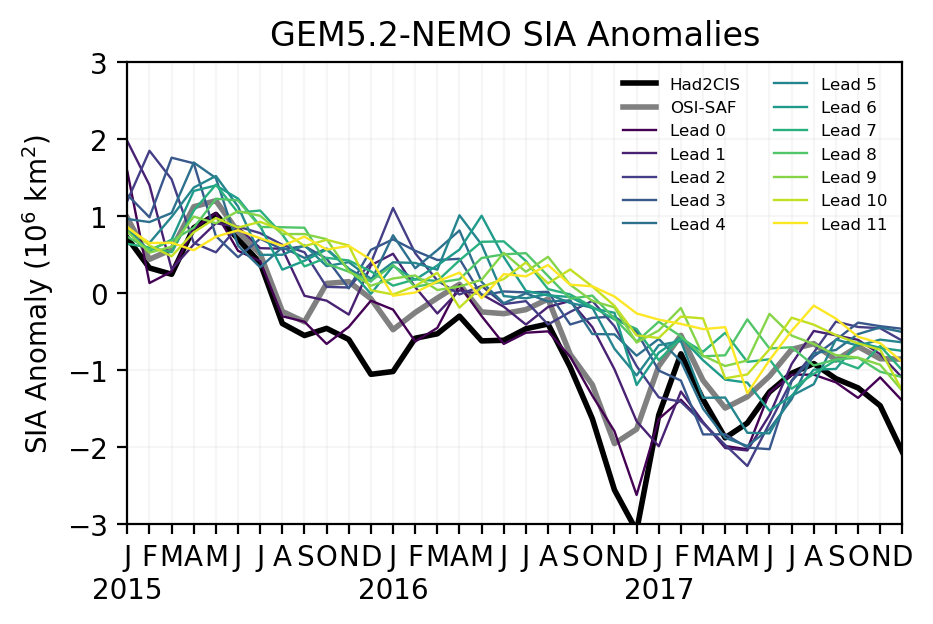

In [25]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2015,2017]
colors = cm.viridis(np.linspace(0,1,12))
labels = ['Had2CIS','OSI-SAF','Lead 0','Lead 1','Lead 2','Lead 3','Lead 4','Lead 5','Lead 6','Lead 7','Lead 8','Lead 9','Lead 10','Lead 11']

# Plot the data
sia_anom_Had2CIS.where((sia_anom_Had2CIS['time.year']>=y0) & (sia_anom_Had2CIS['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,legend=False,linewidth=2,color='black')
sia_anom_OSISAF.where((sia_anom_OSISAF['time.year']>=y0) & (sia_anom_OSISAF['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,legend=False,linewidth=2,color='grey')
for i,data in enumerate(sia_anom_GEM5NEMO_init_lt):
    data = data.drop_vars('lead')
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,legend=False,linewidth=.85,color=colors[i])

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIA Anomaly ($10^6\ \mathrm{km}^2$)")
ax.set_ylim(-3,3)
ax.set_title("GEM5.2-NEMO SIA Anomalies")
ax.grid(alpha=0.1)
ax.legend(labels,ncols=2,fontsize=6,frameon=False)
plt.show()

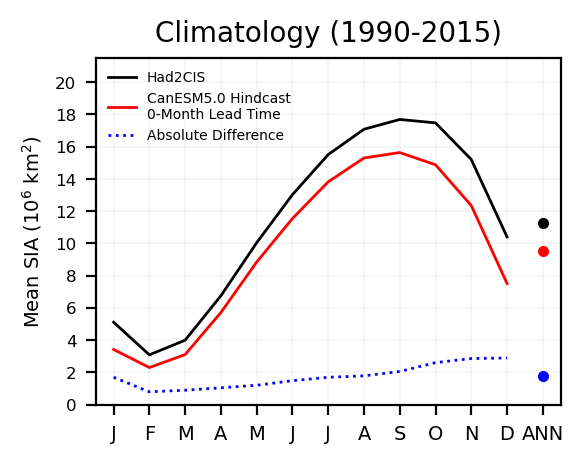

In [36]:
fix,ax=plt.subplots(1,1,figsize=(3,2.25),dpi=200)

# The data to be plotted. Labels for legend are defined in a previous cell.
timeseries = [sia_clim_Had2CIS, sia_clim_CanESM5_init[0], np.abs(sia_clim_Had2CIS - sia_clim_CanESM5_init[0])]
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']
colors = ['black', 'red', 'blue', 'purple','darkgrey','grey']
labels = ['Had2CIS','CanESM5.0 Hindcast\n0-Month Lead Time','Absolute Difference']
linestyles = ['-','-',':']

# Plot the data
for i,data in enumerate(timeseries):
    ax.plot(data['SIA'].values,color=colors[i],label=labels[i],linestyle=linestyles[i],lw=1)
for i,data in enumerate(timeseries):
    ax.plot(12,data['overall_mean'].values,'.',color=colors[i])

# Other details of the plots
ax.set_ylim(0,21.5)
ax.set_yticks(np.arange(0,21,2))
ax.set_yticklabels(np.arange(0,21,2),size=6)
ax.set_xlim(-0.5,12.5)
ax.set_xticks(np.arange(13))
ax.set_xticklabels(xticklabels, size=7)
ax.set_xlabel(None)
ax.set_ylabel(r"Mean SIA ($10^6\ \mathrm{km}^2$)", size=7)
ax.set_title(f"Climatology ({daterange_clim[0]}-{daterange_clim[1]})", size=10)
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=5,frameon=False)
plt.show()

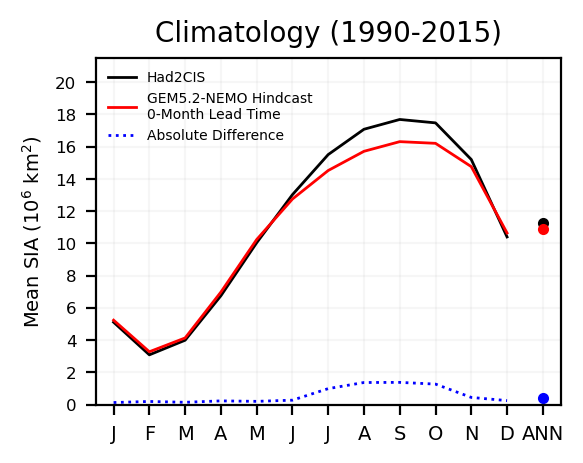

In [37]:
fix,ax=plt.subplots(1,1,figsize=(3,2.25),dpi=200)

# The data to be plotted. Labels for legend are defined in a previous cell.
timeseries = [sia_clim_Had2CIS, sia_clim_GEM5NEMO_init[0], np.abs(sia_clim_Had2CIS - sia_clim_GEM5NEMO_init[0])]
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']
colors = ['black', 'red', 'blue', 'purple','darkgrey','grey']
labels = ['Had2CIS','GEM5.2-NEMO Hindcast\n0-Month Lead Time','Absolute Difference']
linestyles = ['-','-',':']

# Plot the data
for i,data in enumerate(timeseries):
    ax.plot(data['SIA'].values,color=colors[i],label=labels[i],linestyle=linestyles[i],lw=1)
for i,data in enumerate(timeseries):
    ax.plot(12,data['overall_mean'].values,'.',color=colors[i])

# Other details of the plots
ax.set_ylim(0,21.5)
ax.set_yticks(np.arange(0,21,2))
ax.set_yticklabels(np.arange(0,21,2),size=6)
ax.set_xlim(-0.5,12.5)
ax.set_xticks(np.arange(13))
ax.set_xticklabels(xticklabels, size=7)
ax.set_xlabel(None)
ax.set_ylabel(r"Mean SIA ($10^6\ \mathrm{km}^2$)", size=7)
ax.set_title(f"Climatology ({daterange_clim[0]}-{daterange_clim[1]})", size=10)
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=5,frameon=False)
plt.show()

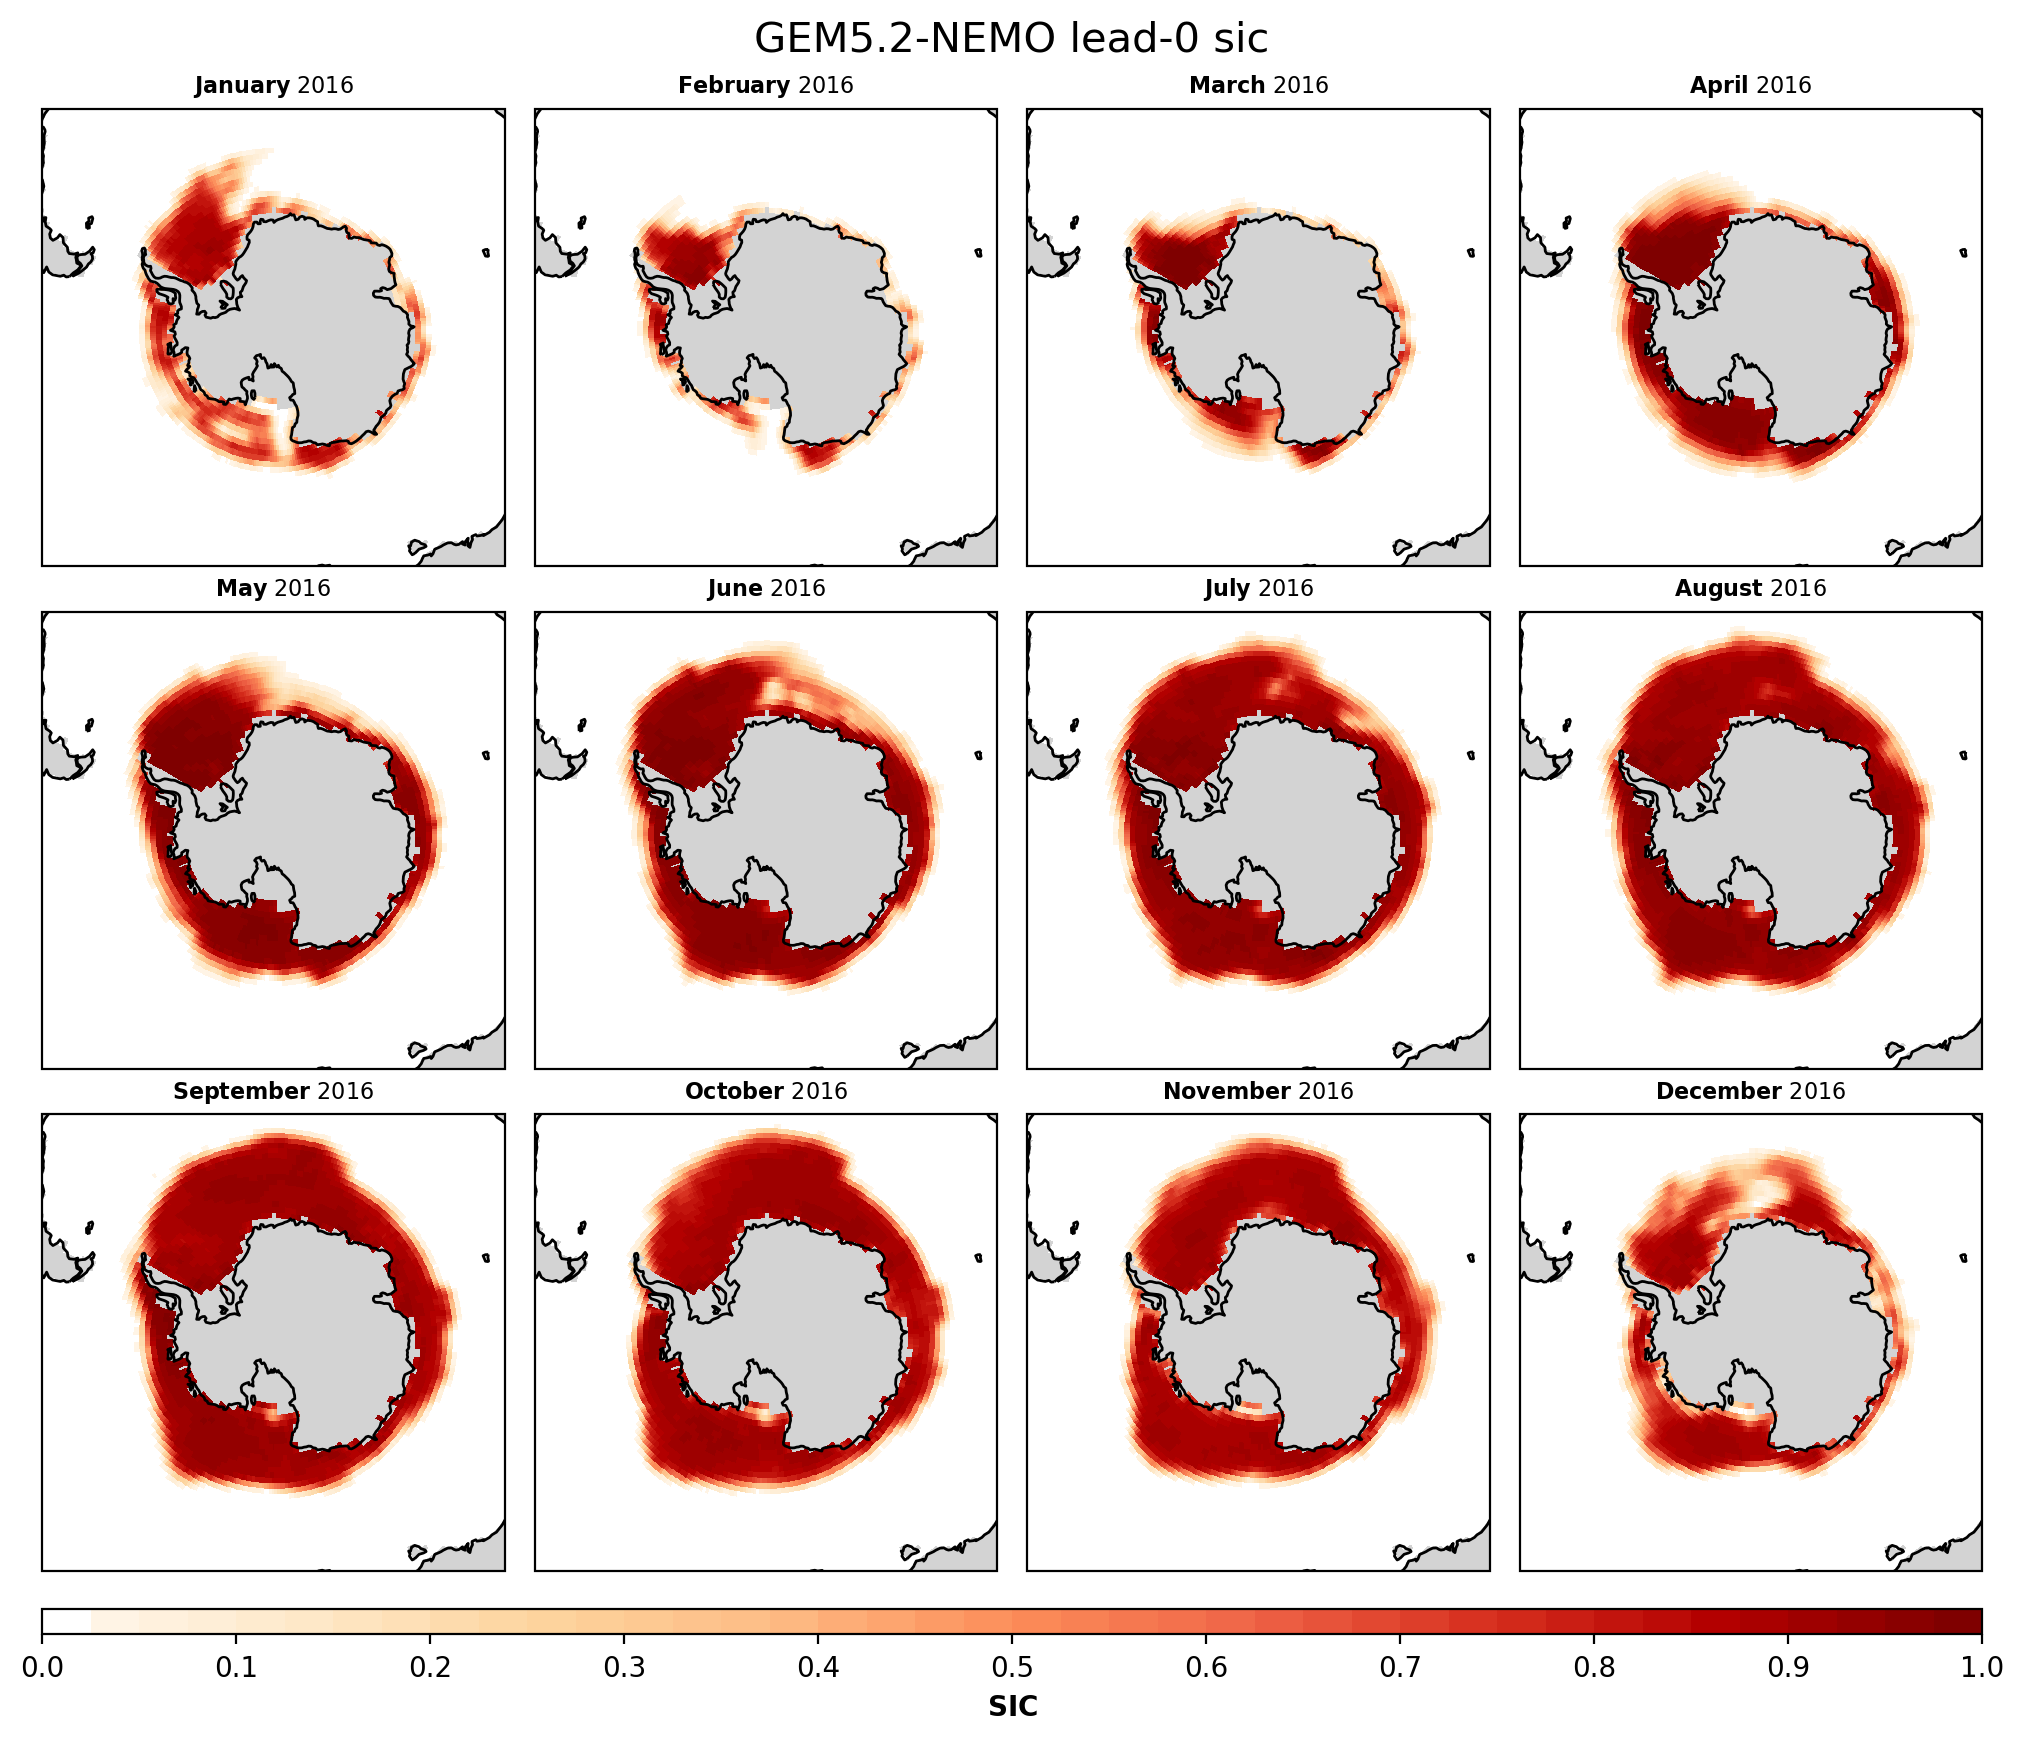

In [27]:
ncols=4
nrows=3
fig, ax = plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,10),facecolor='white',dpi=200,subplot_kw={'projection':ccrs.Orthographic(central_latitude=-90., central_longitude=0.0)})
fig.suptitle("GEM5.2-NEMO lead-0 sic", size=15, y=0.95)
get_month = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]

for i in np.arange(ncols):
    for j in np.arange(nrows): 

        month = get_month[j][i]

        set_extent(ax[j][i])
        ax[j][i].coastlines()

        # sic_data = sic_CanESM5_init[0]
        # sic_data = sic_data.where((sic_data['time.month']==month) & (sic_data['time.year']==2016),drop=True)
        sic_plot = add_sic(ax[j][i], sic_GEM5NEMO_init_lt[0], anom=False, month=month, year=2016)
        sic_plot.set_clim([0., 1.])
        ax[j][i].set_title(f"{monthdict[month]} 2016", size=8)
        
plt.tight_layout()
cticks = np.linspace(0.,1.,11)
cbar = plt.colorbar(sic_plot,ax=ax,aspect=75,shrink=1,ticks=cticks,location='bottom',pad=0.02,label=r"$\mathbf{SIC}$")
plt.show()

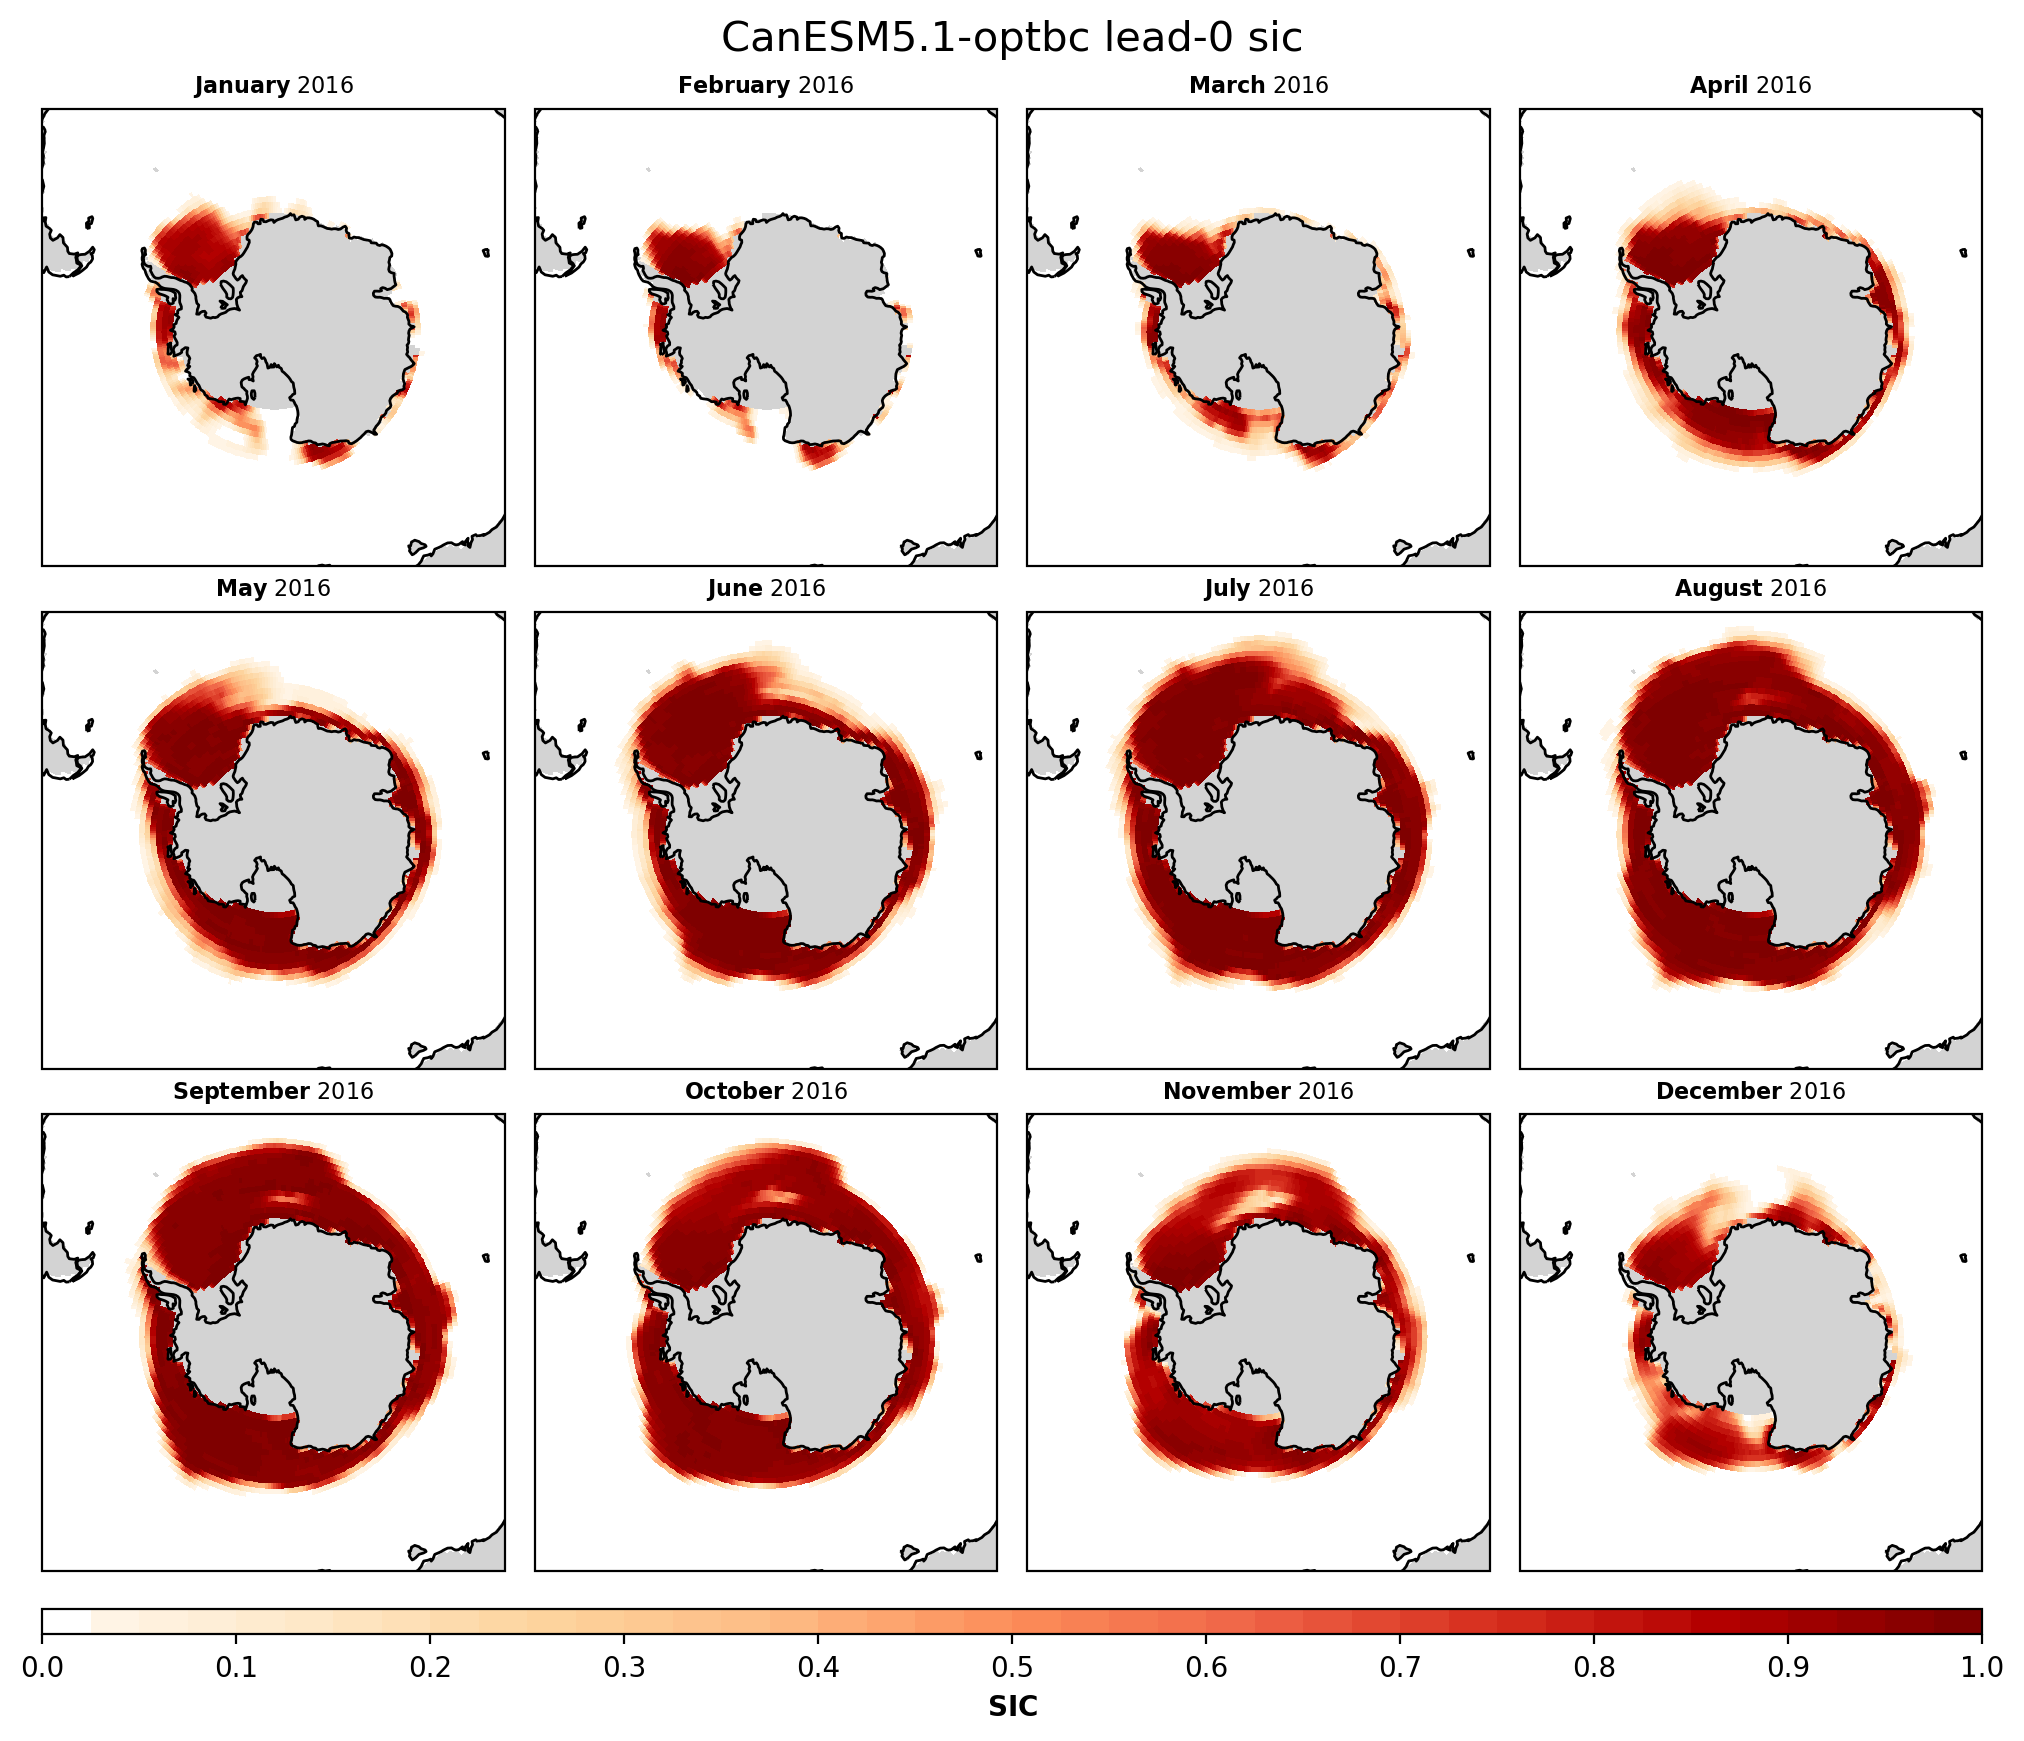

In [28]:
ncols=4
nrows=3
fig, ax = plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,10),facecolor='white',dpi=200,subplot_kw={'projection':ccrs.Orthographic(central_latitude=-90., central_longitude=0.0)})
fig.suptitle("CanESM5.1-optbc lead-0 sic", size=15, y=0.95)
get_month = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]

for i in np.arange(ncols):
    for j in np.arange(nrows): 

        month = get_month[j][i]

        set_extent(ax[j][i])
        ax[j][i].coastlines()

        # sic_data = sic_CanESM5_init[0]
        # sic_data = sic_data.where((sic_data['time.month']==month) & (sic_data['time.year']==2016),drop=True)
        sic_plot = add_sic(ax[j][i], sic_CanESM5_init_lt[0], anom=False, month=month, year=2016)
        sic_plot.set_clim([0., 1.])
        ax[j][i].set_title(f"{monthdict[month]} 2016", size=8)
        
plt.tight_layout()
cticks = np.linspace(0.,1.,11)
cbar = plt.colorbar(sic_plot,ax=ax,aspect=75,shrink=1,ticks=cticks,location='bottom',pad=0.02,label=r"$\mathbf{SIC}$")
plt.show()

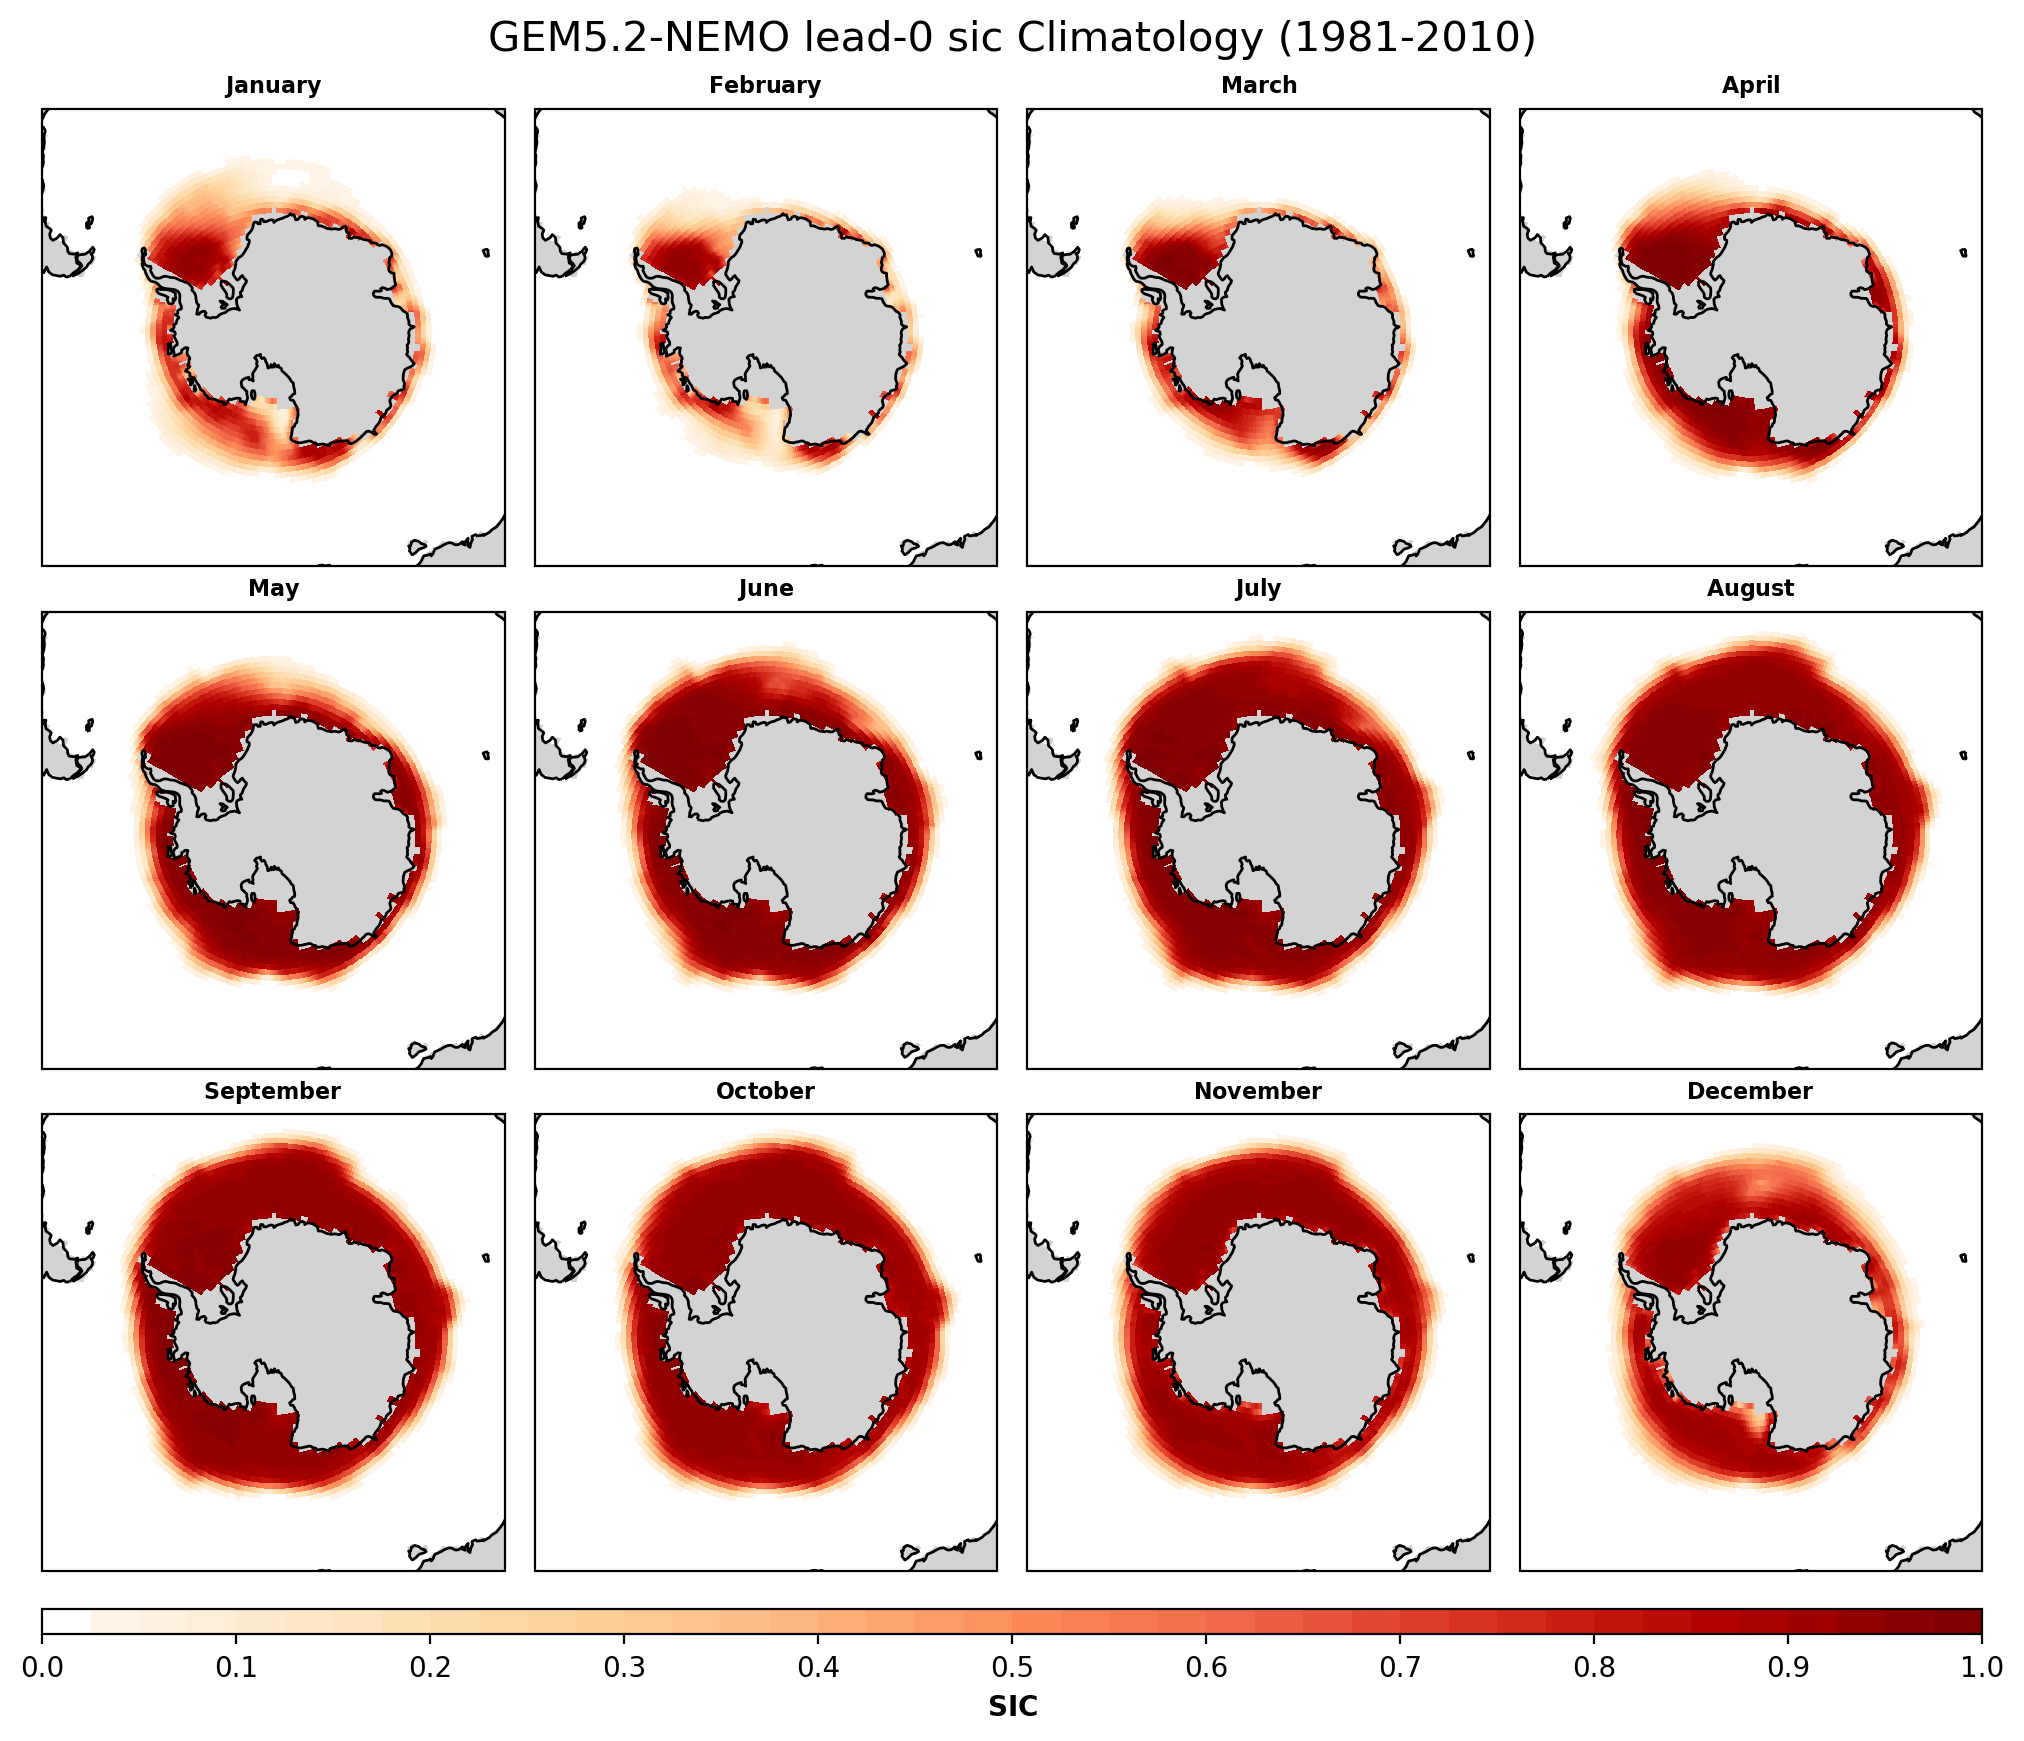

In [29]:
ncols=4
nrows=3
fig, ax = plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,10),facecolor='white',dpi=200,subplot_kw={'projection':ccrs.Orthographic(central_latitude=-90., central_longitude=0.0)})
fig.suptitle("GEM5.2-NEMO lead-0 sic Climatology (1981-2010)", size=15, y=0.95)
get_month = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]

for i in np.arange(ncols):
    for j in np.arange(nrows): 

        month = get_month[j][i]

        set_extent(ax[j][i])
        ax[j][i].coastlines()

        # sic_data = sic_CanESM5_init[0]
        # sic_data = sic_data.where((sic_data['time.month']==month) & (sic_data['time.year']==2016),drop=True)
        sic_plot = add_sic(ax[j][i], sic_clim_GEM5NEMO_init[0], anom=False, month=month, year=None)
        sic_plot.set_clim([0., 1.])
        ax[j][i].set_title(f"{monthdict[month]}", size=8)
        
plt.tight_layout()
cticks = np.linspace(0.,1.,11)
cbar = plt.colorbar(sic_plot,ax=ax,aspect=75,shrink=1,ticks=cticks,location='bottom',pad=0.02,label=r"$\mathbf{SIC}$")
plt.show()

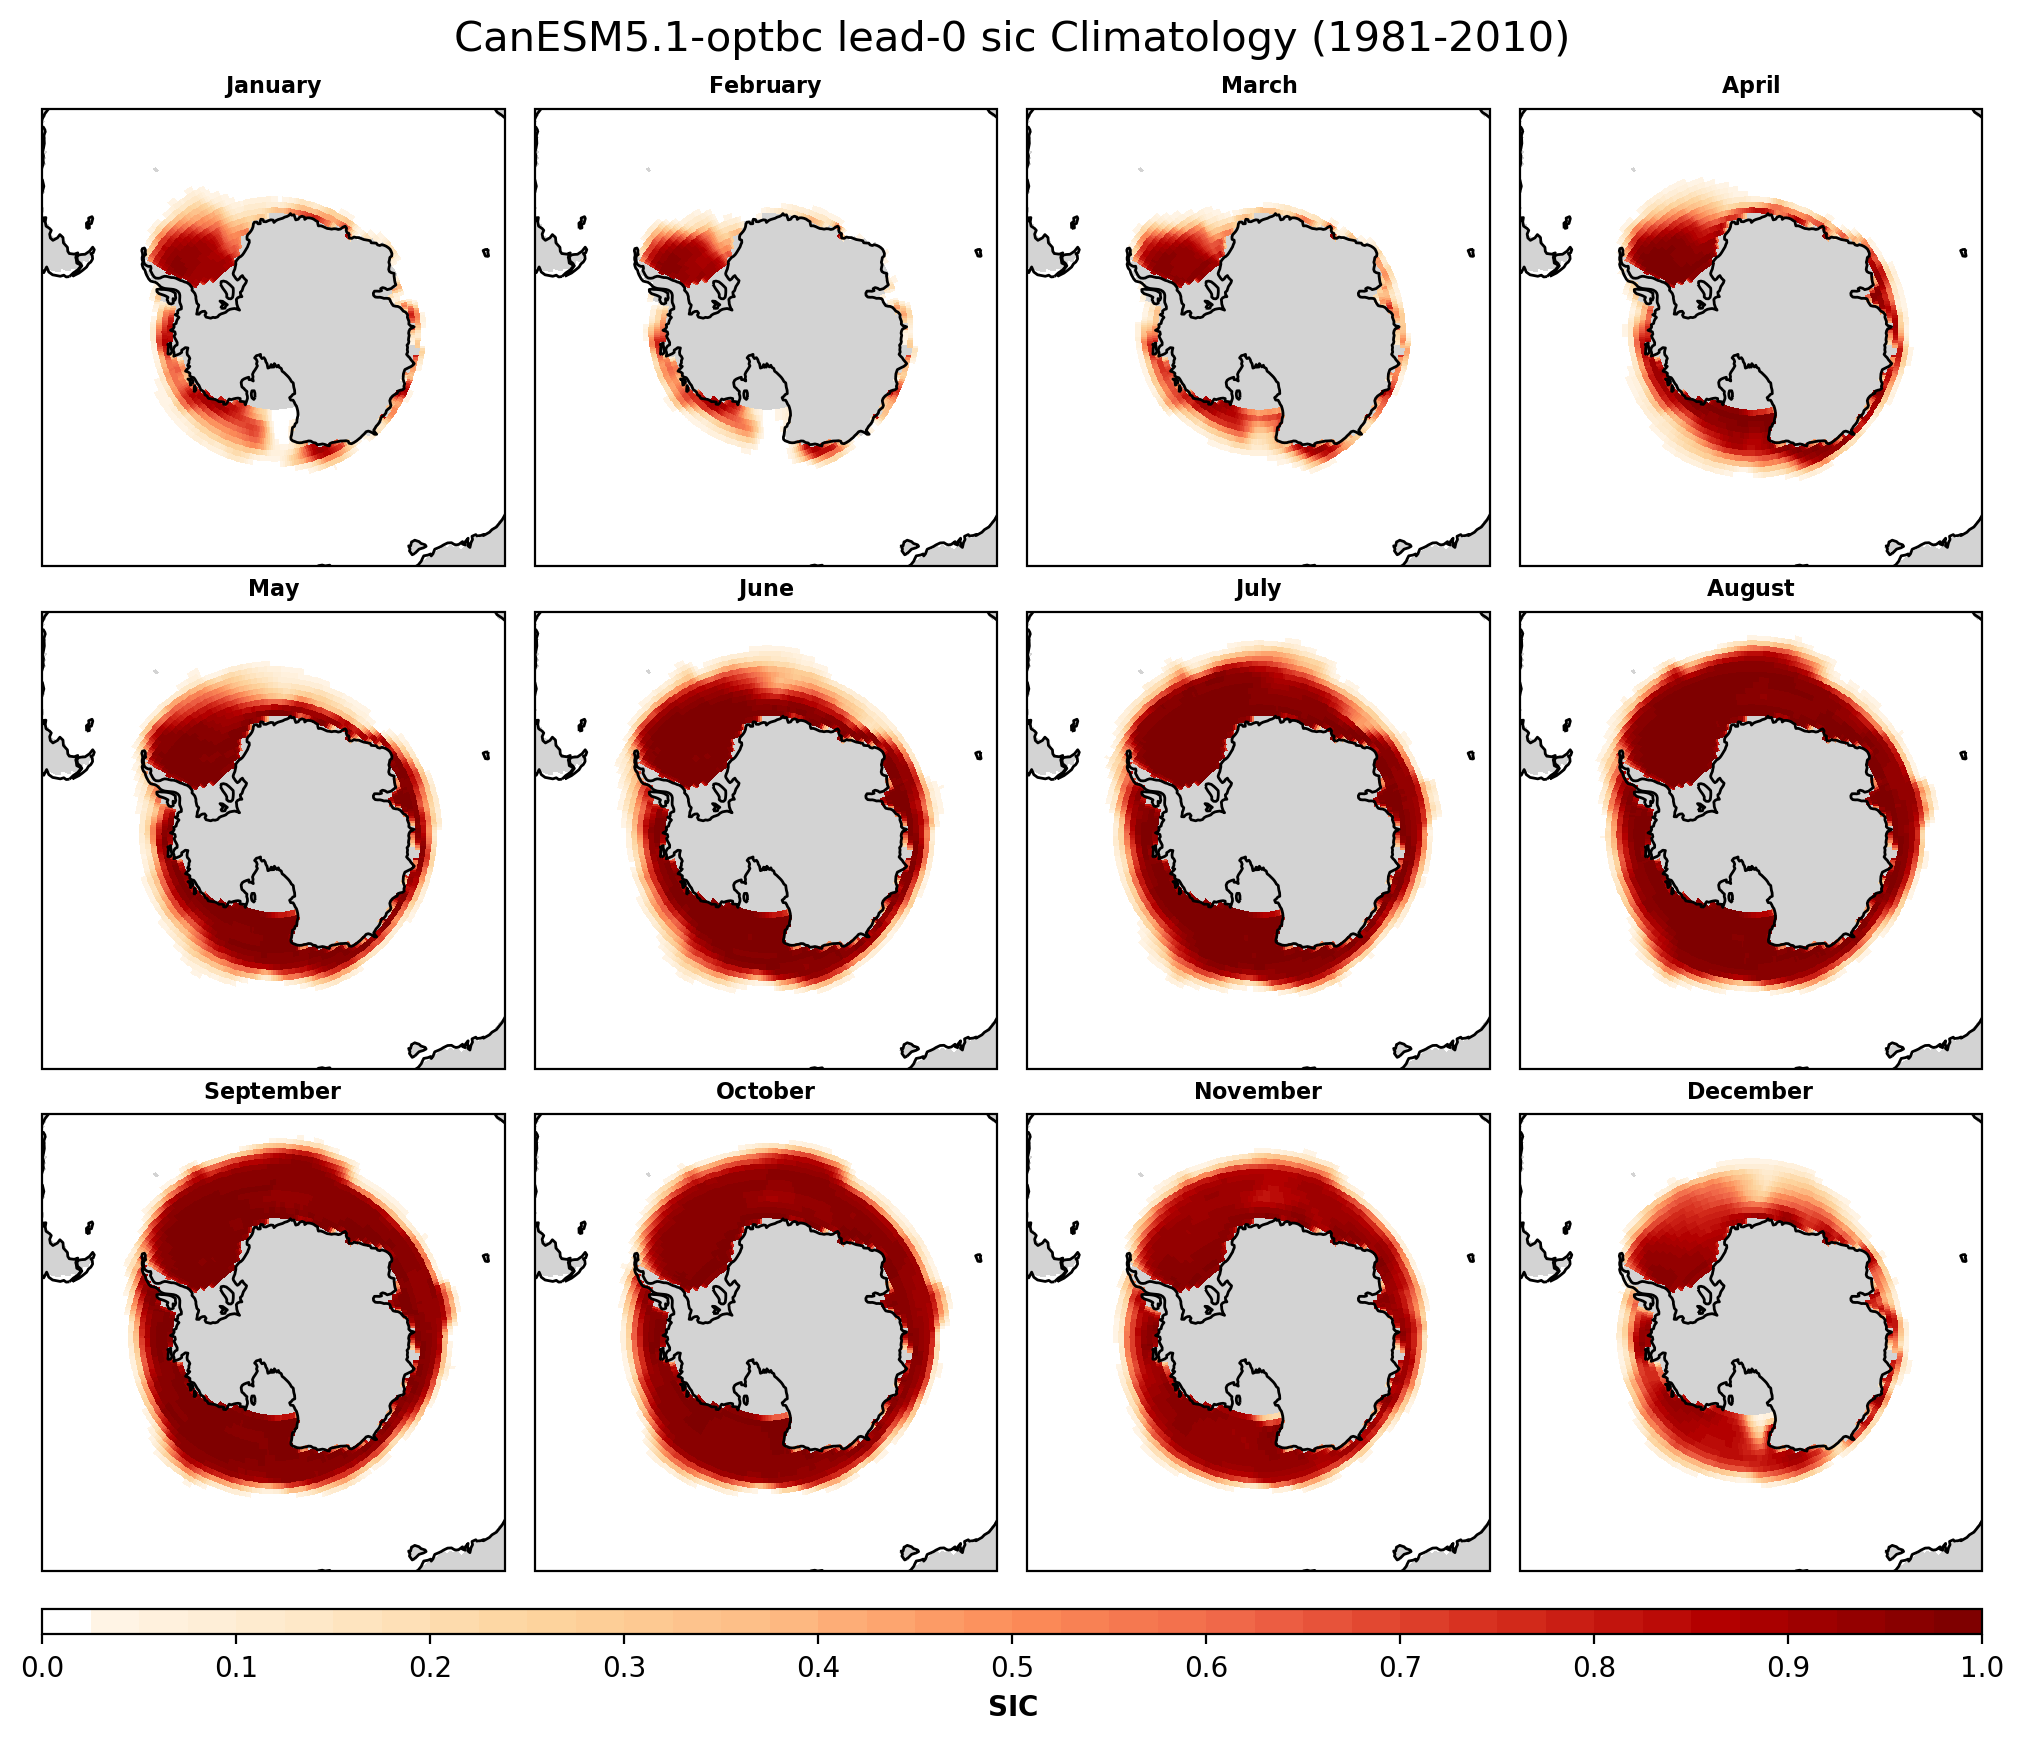

In [30]:
ncols=4
nrows=3
fig, ax = plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,10),facecolor='white',dpi=200,subplot_kw={'projection':ccrs.Orthographic(central_latitude=-90., central_longitude=0.0)})
fig.suptitle("CanESM5.1-optbc lead-0 sic Climatology (1981-2010)", size=15, y=0.95)
get_month = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]

for i in np.arange(ncols):
    for j in np.arange(nrows): 

        month = get_month[j][i]

        set_extent(ax[j][i])
        ax[j][i].coastlines()

        # sic_data = sic_CanESM5_init[0]
        # sic_data = sic_data.where((sic_data['time.month']==month) & (sic_data['time.year']==2016),drop=True)
        sic_plot = add_sic(ax[j][i], sic_clim_CanESM5_init[0], anom=False, month=month, year=None)
        sic_plot.set_clim([0., 1.])
        ax[j][i].set_title(f"{monthdict[month]}", size=8)
        
plt.tight_layout()
cticks = np.linspace(0.,1.,11)
cbar = plt.colorbar(sic_plot,ax=ax,aspect=75,shrink=1,ticks=cticks,location='bottom',pad=0.02,label=r"$\mathbf{SIC}$")
plt.show()